# Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

Тариф «Смарт»

* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей


Необходимо проверить гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Изучение данных

Составим первое представление о данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

calls = pd.read_csv('/datasets/calls.csv')
users = pd.read_csv('/datasets/users.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Получили первый 10 строк таблицы `calls`, теперь посмотрим общую информацию:

In [2]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Итак, в таблице `calls` 4 стоблца, типы данных float, int, object.

**Составим представление о таблице `users`:**

In [3]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице 8 стоблцов, типы данных int и object. 

**Составим представление о таблице `messages`:**

In [5]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [6]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице 3 стоблца, типы данных int и object. 

**Составим представление о таблице `internet`:**

In [7]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице 5 столбцов,типы данных float, int, object. 

**Составим представление о таблице `tariffs`:**

In [9]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице 8 стоблцов и всего 2 строки по двум тарифам. Типы данных int, object.

Согласно документации к данным:

Таблица `users` (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

Таблица `calls` (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Таблица `messages` (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Таблица `internet` (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Таблица `tariffs` (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Нарушение стиля в стоблцах отсутствуют.
В таблице `users` есть пропуски в столбце churn_date, их мы трогать не будем(если значение пропущено, то тариф ещё действовал на момент выгрузки данных). В остальных таблицах пропусков нет.

### Вывод

В нашем распоряжении 5 таблиц с данными о пользователях, откуда они, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 
Предварительно можно утверждать что данных достаточно для проверки гипотез. 

## Подготовка данных

### Изменение типов данных
Приведем данные в столбцах в нужный формат:

In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['mb_used'] = internet['mb_used'].astype('int')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Исправление ошибок в данных

**Таблица `calls`**

В данных присутствуют звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Округлим значение длительности звонка в минутах в большую сторону(«Мегалайн» всегда округляет секунды до минут) и создадим отдельный столбец с месяцем из даты звонка:

In [12]:
calls['duration'] = np.ceil(calls['duration'])
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
5,1000_5,2018-11-02,0.0,1000,11
6,1000_6,2018-10-18,0.0,1000,10
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9
9,1000_9,2018-08-15,0.0,1000,8


**Таблица `messages`**

Создадим отдельный столбец с месяцем из даты сообщения:

In [13]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


**Таблица `internet`**

Создадим отдельный столбец с месяцем и переведем интернет трафик из мегабайтов в гигабайты и так же  создадим отдельный столбец.

In [14]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet['gb_used'] = internet['mb_used'] / 1024
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month,gb_used
0,0,1000_0,112,2018-11-25,1000,11,0.109375
1,1,1000_1,1052,2018-09-07,1000,9,1.027344
2,2,1000_2,1197,2018-06-25,1000,6,1.168945
3,3,1000_3,550,2018-08-22,1000,8,0.537109
4,4,1000_4,302,2018-09-24,1000,9,0.294922


### Рассчеты для каждого пользователя

**Количество сделанных звонков и израсходованных минут разговора по месяцам**

Создадим сводную таблицу:

In [15]:
calls_pivot_table = calls.pivot_table(index=['user_id', 'month'], values= 'duration', aggfunc=['count', 'sum'])
calls_pivot_table.columns = ['count_calls', 'sum_minute_calls']
calls_pivot_table

count_calls  sum_minute_calls
user_id month                               
1000    5               22             159.0
        6               43             172.0
        7               47             340.0
        8               52             408.0
        9               58             466.0
...                    ...               ...
1498    10              41             247.0
1499    9                9              70.0
        10              68             449.0
        11              74             612.0
        12              69             492.0

[3174 rows x 2 columns]

**Количество отправленных сообщений по месяцам**

In [16]:
messages_pivot_table = messages.pivot_table(index=['user_id', 'month'], values= 'id', aggfunc='count')
messages_pivot_table.columns = ['count_messages']
messages_pivot_table

count_messages
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

**Объем израсходованного интернет-трафика по месяцам**

Создадим сводную таблицу и округлим количество Гб в большую сторону(Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону.)

In [17]:
internet_pivot_table = internet.pivot_table(index=['user_id', 'month'], values= 'gb_used', aggfunc='sum')
internet_pivot_table.columns = ['sum_gb_used']
internet_pivot_table['sum_gb_used'] = np.ceil(internet_pivot_table['sum_gb_used'])
internet_pivot_table

sum_gb_used
user_id month             
1000    5              3.0
        6             23.0
        7             14.0
        8             14.0
        9             15.0
...                    ...
1498    10            21.0
1499    9              2.0
        10            18.0
        11            18.0
        12            13.0

[3203 rows x 1 columns]

**Помесячную выручку с каждого пользователя**

Объеденим 3 сводных таблицы с таблицей users в одну и посчитаем выручку с каждого пользователя таким способом:

Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножем на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану.

Тариф «Смарт»

* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

In [18]:
calls_and_messages = calls_pivot_table.merge(messages_pivot_table, on=['user_id', 'month'])
calls_messages_internet = calls_and_messages.merge(internet_pivot_table, on=['user_id', 'month']) #потом соеденить с интернетом по id и месяцу
df_merge = calls_messages_internet.merge(users, on='user_id', how='left')
df_merge.head(10)

,user_id,count_calls,sum_minute_calls,count_messages,sum_gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,22,159.0,22,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,43,172.0,60,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,47,340.0,75,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,52,408.0,81,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,58,466.0,57,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,57,350.0,73,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,43,338.0,58,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,46,333.0,70,10.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1002,15,117.0,4,11.0,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
9,1002,26,214.0,11,18.0,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


Создадим функцию, которая будет считать выручку

In [19]:
def income(row):
    if row['tariff'] == 'smart': 
        sms = (row['count_messages'] - 50)*3
        mins = (row['sum_minute_calls'] - 500)*3
        gb = (row['sum_gb_used'] - 15)*200
        total = 550
        for i in [sms, mins, gb]:
            if i > 0:
                total += i
    if row['tariff'] == 'ultra':
        sms = (row['count_messages'] - 1000)*1
        mins = (row['sum_minute_calls'] - 3000)*1
        gb = (row['sum_gb_used'] - 30)*150
        total = 1950
        for i in [sms, mins, gb]:
            if i > 0:
                total += i
                
    return total

df_merge['total_income'] = df_merge.apply(income,axis=1)
df_merge.head(10)

,user_id,count_calls,sum_minute_calls,count_messages,sum_gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,total_income
0,1000,22,159.0,22,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
1,1000,43,172.0,60,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
2,1000,47,340.0,75,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
3,1000,52,408.0,81,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
4,1000,58,466.0,57,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
5,1000,57,350.0,73,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
6,1000,43,338.0,58,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
7,1000,46,333.0,70,10.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
8,1002,15,117.0,4,11.0,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,550.0
9,1002,26,214.0,11,18.0,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,1150.0


### Вывод

Изменили типы данных в необходимых столбцах и дополнили наши таблицы значениями: посчитали количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам и помесячную выручку с каждого пользователя. Данные нам пригодятся для дальнейшего анализа.

## Анализ данных

### Описание поведения клиентов

Создадим 2 таблицы по тарифам

In [20]:
smart = df_merge.query('tariff == "smart"')
ultra = df_merge.query('tariff == "ultra"')

In [21]:
smart[['sum_minute_calls','count_messages','sum_gb_used','total_income']].describe()

,sum_minute_calls,count_messages,sum_gb_used,total_income
count,1915.000000,1915.000000,1915.000000,1915.000000
mean,421.034987,38.767102,16.343603,1287.544648
std,187.712806,26.810513,5.664880,821.141734
min,0.000000,1.000000,0.000000,550.000000
25%,287.500000,17.000000,13.000000,553.000000
50%,427.000000,34.000000,17.000000,1009.000000
75%,547.000000,55.000000,20.000000,1750.000000
max,1435.000000,143.000000,38.000000,6770.000000


In [22]:
ultra[['sum_minute_calls','count_messages','sum_gb_used','total_income']].describe()

,sum_minute_calls,count_messages,sum_gb_used,total_income
count,752.000000,752.000000,752.000000,752.000000
mean,556.857713,61.640957,19.603723,2048.337766
std,311.862810,44.816850,9.382386,331.402263
min,0.000000,1.000000,0.000000,1950.000000
25%,331.750000,25.000000,12.000000,1950.000000
50%,537.500000,53.000000,19.000000,1950.000000
75%,760.250000,89.000000,27.000000,1950.000000
max,1673.000000,224.000000,49.000000,4800.000000


Медианное число израсходованных минут по месяцам в тарифе `smart` 427, в `ultra` 538.

Медианное количество сообщений в `smart` 34, в `ultra` 53

Медианный объем ихрасходованного трафика в `smart` 17Гб, в `ultra` 19Гб.

Медианная прибыль с одного клиента в месяц в `smart` 1009 рублей, в `ultra` 1950 рублей.


**Посчитаем среднее количество, дисперсию и стандартное отклонение для минут разговора по двум тарифам:**

In [23]:
mins_tariffs = df_merge.pivot_table(index='tariff', values='sum_minute_calls', aggfunc=['mean','std','var'])
mins_tariffs.columns=['mean','std','var']
mins_tariffs

,mean,std,var
tariff,,,
smart,421.034987,187.712806,35236.097521
ultra,556.857713,311.862810,97258.412484


Среднее значение, стандартное отклоние и дисперсия минут для тарифа ultra больше.

**Посчитаем среднее количество, дисперсию и стандартное отклонение для сообщений по двум тарифам:**

In [24]:
sms_tariffs = df_merge.pivot_table(index='tariff', values='count_messages', aggfunc=['mean','std','var'])
sms_tariffs.columns=['mean','std','var']
sms_tariffs

,mean,std,var
tariff,,,
smart,38.767102,26.810513,718.803619
ultra,61.640957,44.816850,2008.550011


Среднее значение, стандартное отклоние и дисперсия сообщений для тарифа ultra больше.

**Посчитаем среднее количество, дисперсию и стандартное отклонение для интернет-трафика по двум тарифам:**

In [25]:
gb_tariffs = df_merge.pivot_table(index='tariff', values='sum_gb_used', aggfunc=['mean','std','var'])
gb_tariffs.columns=['mean','std','var']
gb_tariffs

,mean,std,var
tariff,,,
smart,16.343603,5.664880,32.090862
ultra,19.603723,9.382386,88.029174


Среднее значение, стандартное отклоние и дисперсия интернет-трафика для тарифа ultra больше.

### Построение гистограмм

**Построим гистограмму для минут разговора по двум тарифам**

Text(0.5, 0, 'Минуты')

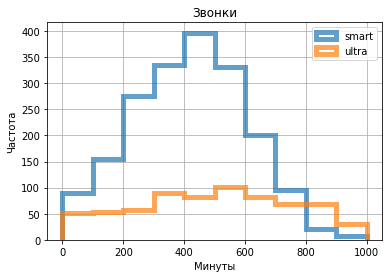

In [26]:
ax = smart.plot(
    kind='hist',
    y='sum_minute_calls',
    histtype='step',
    grid=True,
    bins=10, 
    range=[0,1000],
    alpha=0.7, 
    linewidth=5,
    label='smart'
)
ultra.plot(
    kind='hist',
    y='sum_minute_calls',
    histtype='step',
    grid=True,
    bins=10, 
    range=[0,1000],
    alpha=0.7, 
    linewidth=5, 
    label='ultra',
    ax=ax, 
    legend=True)
plt.title('Звонки')
plt.ylabel('Частота')
plt.xlabel('Минуты')

Нормальное распределение

**Построим гистограмму для сообщений по двум тарифам**

Text(0.5, 0, 'Количество смс')

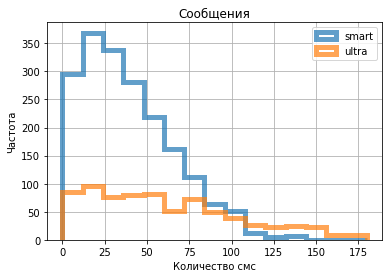

In [27]:
ax = smart.plot(
    kind='hist',
    y='count_messages',
    histtype='step',
    grid=True,
    bins=15, 
    range=[0,180],
    alpha=0.7, 
    linewidth=5,
    label='smart'
)
ultra.plot(
    kind='hist',
    y='count_messages',
    histtype='step',
    grid=True,
    bins=15, 
    range=[0,180],
    alpha=0.7, 
    linewidth=5, 
    label='ultra',
    ax=ax, 
    legend=True)
plt.title('Сообщения')
plt.ylabel('Частота')
plt.xlabel('Количество смс')

Для тарифа smart нормальное распределение со смещением влево, распределение тарифа ultra сильно отличается от нормального.

**Построим гистограмму для интернет-трафика по двум тарифам**

Text(0.5, 0, 'Гб')

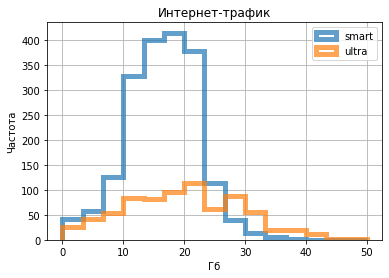

In [28]:
ax = smart.plot(
    kind='hist',
    y='sum_gb_used',
    histtype='step',
    grid=True,
    bins=15, 
    range=[0,50],
    alpha=0.7, 
    linewidth=5,
    label='smart'
)
ultra.plot(
    kind='hist',
    y='sum_gb_used',
    histtype='step',
    grid=True,
    bins=15, 
    range=[0,50],
    alpha=0.7, 
    linewidth=5, 
    label='ultra',
    ax=ax, 
    legend=True
)
plt.title('Интернет-трафик')
plt.ylabel('Частота')
plt.xlabel('Гб') 

Нормальное распределение

### Вывод

Для пользователей тарифа «Смарт» характерно следующее:
* в среднем требуется от 300 до 550 минут на звонки в месяц;
* от 15 до 48 сообщений в месяц;
* от 13 до 23 Гб интернет-трафика в месяц.

Для пользователей тарифа «Ультра» характерно следующее:
* в среднем требуется от 300 до 900 минут на звонки в месяц;
* до 105 сообщений в месяц;
* от 10 до 32 Гб интернет-трафика в месяц.

Пользователи тарифа 'Смарт' чаще превышают лимит, особенно по звонкам и интернет-трафику. В то время как пользователи тарифа 'Ультра' могут превысить лимит только по интернет-трафику.


## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Сформулируем нулевую и альтернативную гипотезы:

* Н0: Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны;
* Н1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Для проверки гипотезы воспользуемся методом `scipy.stats.ttest_ind` т.к мы имеем две независимые генеральные совокупности.

In [29]:
alpha = .05
results = st.ttest_ind(df_merge[df_merge['tariff'] == 'smart']['total_income'],df_merge[df_merge['tariff'] == 'ultra']['total_income'],equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.1602666276933817e-211
Отвергаем нулевую гипотезу


Данные предоставляют достаточное основание — для выбранного уровня значимости — отвергнуть нулевую гипотезу. Вероятность, что средняя выручка тарифов «Ультра» и «Смарт» равны близится к 0. Кстати, даже при более строгом критическом значении статистической значимости — 0.01 — мы бы получили тот же результат: p-value не превышает и этого значения.

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем нулевую и альтернативную гипотезы:

* Н0: Cредняя выручка пользователей из Москвы равна выручке пользователей из других регионов;
* Н1: Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для проверки гипотезы воспользуемся методом `scipy.stats.ttest_ind` т.к мы имее две независимые генеральные совокупности.

In [30]:
alpha = .05
results = st.ttest_ind(df_merge[df_merge['city'] == 'Москва']['total_income'],df_merge[df_merge['city'] != 'Москва']['total_income'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11476827641741034
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 12%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средней выручкой пользователей из Москвы и других регионов. 

Cредняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

## Общий вывод

В ходе проекта была произведена предобработка исходных датасетов: добавлены столбцы с месяцами для таблиц calls, messages, internet, округлены в большую сторону количество минут разговора пользователей, переведены мб в гб, изменены типы данных необходимых значений.

Для каждого пользователя были рассчитаны: количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам, помесячная выручка с каждого пользователя.

Расчитано, сколько минут разговора, сообщений и какой объем трафика требуется пользователям каждого тарифа в месяц. Произвели расчет среднего количества, дисперсии и стандартного отклонения.

Построены гистограммы, проанализированы распределения и сделаны выводы.

Сформулированы и проверены гипотезы о различии выручки в зависимости от тарифа и от города пользователей.

По результатам статистического анализа доходы от тарифа «Ультра» больше, чем от тарифа «Смарт»: в среднем «Мегалайн» от одного пользователя в месяц получает 1950 рублей и 1009 рублей соответственно.

Однако, пользователи больше предпочитают тариф «Смарт». И именно этот тариф приносит больше дополнительного дохода т.к пользователи чаще превышают лимит(по количеству минут и особенно по интернет-трафику).

Пользователи тарифа «Ультра» могут превысить лимит только в количестве гб интернета.